# Bootcamp materials

## Background

## Key Terminology
- **Autoregression**: a time-series forecasting method that models the relationship between a variable and its past values. In an autoregression model, a dependent variable is modeled as a function of its previous values. 
    - Autoregression defines, how many of the test values are taken into account to predict the future values.
    - We define the lags - on how many last timepoints is the future value dependent on (e.g., lag = 7 means that the value depends on the previous 7 values).
- **Traditional TSF models**: statistical models that use past data to make predictions. These models typically rely on assumptions, such as stationarity (time series having a constant mean, variance, and autocorrelation over time). Examples:
    - Autoregressive Integrated Moving Average (ARIMA)
    - Seasonal Autoregressive Integrated Moving Average (SARIMA)
    - Exponential Smoothing (ES)
    - Vector Autoregression (VAR)
    - Bayesian Structural Time Series (BSTS)
- **Deep TSF models**: neural networks based models that can handle non-stationary data and are often suitable for complex time-series problems. Examples: 
    - Recurrent Neural Networks (RNNs), including Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRUs)
    - Convolutional Neural Networks (CNNs) for time series
    - Deep Neural Networks (DNNs) with time-series as input
    - WaveNet, a deep generative model for time series
    - Transformer-based models: Time Series Transformer (TST), Temporal Fusion Transformer (TFT)
- **One-step prediction**: involves predicting the next value in a time-series based on its past values 
    - e.g., predict tomorrow's stock prcie from today's price and other past data. 
- **Multi-step prediction**: involves predicting multiple future values in time-series (e.g., predict the stock price for next month).
- **Single TSF**: involves predicting the future values of a time series of a single time series 
    - e.g., a single stock's price
- **Multiple TSF**: involves predicting the future values of multiple related time-series 
    - e.g., the overall market index which consists of individual stocks
- **Local model**: predicts future values of a time-series based only on its own values.
    - e.g., predict tomorrow's temperature based only on past temperature values
- **Global model**: considers the relationships between multiple time series when making predictions
    - e.g., in addition to considering past temperature values, also past humidity and wind speed are used to make predictions.
- **Event**: specific occurrences that affect time series data. 
    - e.g., natural disaster, major news event, holiday, etc.
- **Lagged regressor**: past value of a variable that is used to predict future values of that same variable. This past variable is shifted forward in time by a certain number of time steps (aka lags).
- **Fourier terms**: used to capture the seasonal patterns in the data. Fourier analysis decompose a time series into its underlying frequency components using sine and cosine waves sof differnt frequencies. Fourier terms represent the coefficients of these sine and cosine waves, and are used to model periodicity and seasonality in the data. The number of terms depend on the frequency of seasonality - the more seasonal patterns, the more terms are needed.

## NeuralProphet Capabilities
### Time series components:
- **Trend**: linear or piece-wise linear trend by using changepoints
- **Seasonality**: fourier terms (can handle multiple seasonalities and high-frequency data)
- **Auto-regression**: implementation of AR-Net (Auto-Regressive Feed-Forward Neural Network)
- **Special events**: modelled as covariates with dedicated coefficients
- **Future regressors**: modelled as covariates with dedicated coefficients
- **Lagged regressors**: modelled separately using Feed-Forward Neural Nets

The components can also be regularized.

### Data Preprocessing
- **Normalization**
    - **default**: **min-max normalization**
    - can be **z-score normalized**
    - **covariates** can be normalized; the **default** (apart from binary features), 'auto', applies **z-score normalization**
- **Imputation**
    - **only** if **autoregression enabled**
    - can define to not impute or drop the data (use with caution)
    - no special imputation for binary data (taken as 0 if missing)
    - for **numeric data** in **2 steps**
        - **small gaps** are filled with **linear imputation**
        - **larger gaps** are then filled with **rolling averages**
    - when **auto-regression enabled**, the observed `y`-s are **preprocessed in a moving window format** to learn from lagged values.
    
### Additional
- NeuralProphet **can produce both single- and multi step-ahead forecasts**
- **can use external information (covariates)**
- users **can visualize the components of time-series** as well as their interaction

## Bootcamp Challenge #1: Understanding NeuralProphet
The main aim of this challenge is to understand what are the capabilities of NeuralProphet from both thoretial underpinnings as well as via practical implementation (code runs).

What makes NeuralProphet special is that it implements several techniques that are usually found in isolation in other frameworks. This allows to not only produce well-performing models but also to produce explainable forecasts by decomposing the forecast components, such as trends and seasonality (e.g., weekly and/or yearly). 

In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/wp_log_peyton_manning.csv')

### Trend

In [4]:
model_trend = NeuralProphet(
    n_changepoints=100,
    trend_reg = 2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False
)
metrics = model_trend.fit(df)
forecast = model_trend.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: 

Epoch 141: 100%|██████████| 141/141 [00:00<00:00, 1410.78it/s, loss=0.0121, v_num=747, MAE=0.632, RMSE=0.813, Loss=0.0128, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D



Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 335.01it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [5]:
forecast.head()

,ds,y,yhat1,trend
0,2007-12-10,9.5908,8.406055,8.406055
1,2007-12-11,8.5196,8.404095,8.404095
2,2007-12-12,8.1837,8.402135,8.402135
3,2007-12-13,8.0725,8.400174,8.400174
4,2007-12-14,7.8936,8.398214,8.398214


#### Plotting

In [23]:
model_trend.plot(forecast, plotting_backend = 'plotly')

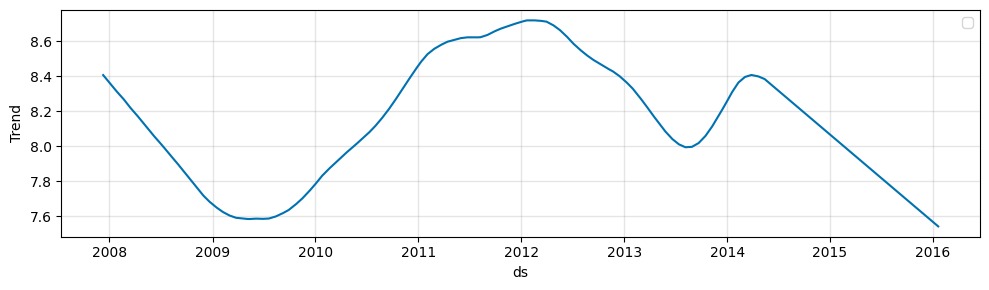

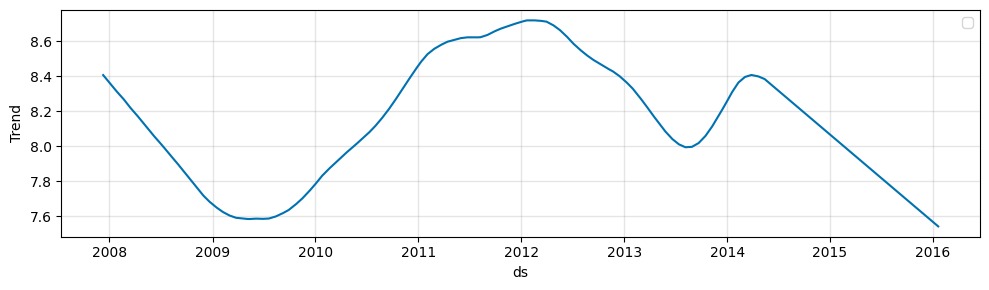

In [18]:
model_trend.plot_components(forecast, plotting_backend = 'default')

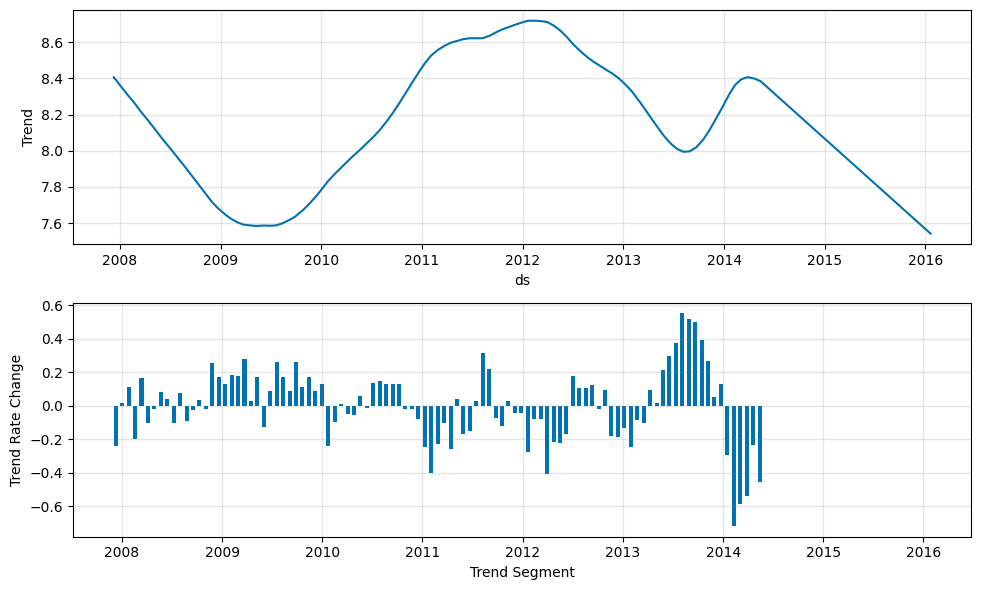

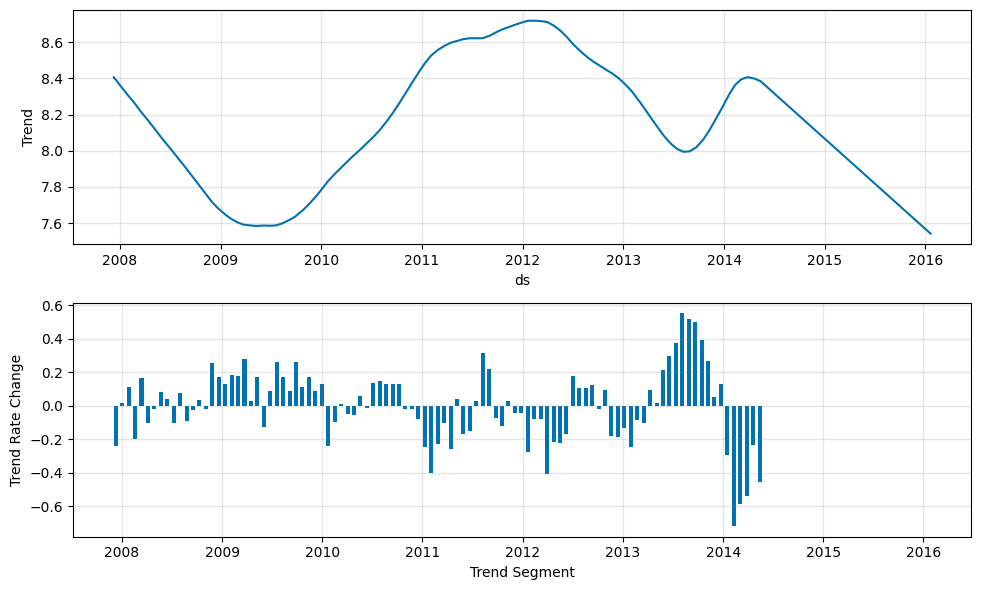

In [19]:
model_trend.plot_parameters(forecast, plotting_backend = 'default')

## Seasonality

In [9]:
model_season = NeuralProphet(
    yearly_seasonality= 8,
    weekly_seasonality=3,
    daily_seasonality=False,
    seasonality_reg=1 # regularizing seasonality
)
metrics_season = model_season.fit(df)
forecast_season = model_season.predict(df)

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The numb

Epoch 7:   5%|▍         | 7/141 [00:00<00:00, 14498.83it/s, loss=0.0602, v_num=748, MAE=1.810, RMSE=2.190, Loss=0.080, RegLoss=0.000]

Finding best initial lr: 100%|██████████| 237/237 [00:01<00:00, 207.52it/s]

Epoch 9:   6%|▋         | 9/141 [00:00<00:00, 13496.15it/s, loss=0.0302, v_num=748, MAE=1.230, RMSE=1.430, Loss=0.0336, RegLoss=0.000]

Epoch 141: 100%|██████████| 141/141 [00:00<00:00, 1130.21it/s, loss=0.004, v_num=748, MAE=0.340, RMSE=0.474, Loss=0.00458, RegLoss=5.24e-5]    

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D



Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 435.29it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [20]:
forecast_season.head()

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2007-12-10,9.5908,8.815390,7.965691,0.496606,0.353093
1,2007-12-11,8.5196,8.571899,7.964803,0.489488,0.117608
2,2007-12-12,8.1837,8.380210,7.963916,0.481035,-0.064741
3,2007-12-13,8.0725,8.365908,7.963028,0.471436,-0.068557
4,2007-12-14,7.8936,8.357293,7.962141,0.460917,-0.065765


## Auto-Regression
Auto-regression can be set with the `n_lags` parameter which denotes the number of lags into AR-NET, and the number of forecasts steps can also be defined (`n_forecasts` parameter)

In [11]:
model_ar = NeuralProphet(
    n_forecasts=3,
    n_lags = 5,
    yearly_seasonality= False,
    weekly_seasonality=False,
    daily_seasonality=False
)
metrics_ar = model_ar.fit(df)
forecast_ar = model_ar.predict(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (93) is too small than the required number for the learning rate finder (237). The re

Epoch 137:  97%|█████████▋| 137/141 [00:00<00:00, 283622.73it/s, loss=0.00433, v_num=749, MAE=0.328, RMSE=0.486, Loss=0.0047, RegLoss=0.000] 

Finding best initial lr: 100%|██████████| 237/237 [00:15<00:00, 878.75it/s]

Epoch 141: 100%|██████████| 141/141 [00:00<00:00, 1274.49it/s, loss=0.00418, v_num=749, MAE=0.329, RMSE=0.485, Loss=0.00471, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D



Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 374.99it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [12]:
forecast_ar.head()

,ds,y,yhat1,yhat2,yhat3,ar1,ar2,ar3,trend
0,2007-12-10,9.5908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-12-11,8.5196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-12-12,8.1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-12-13,8.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-12-14,7.8936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
